# Data Wrangling and Cleaning

1.1 Importing the library 

In [1]:
import pandas as pd
import numpy as np
import nltk
import random
import os
from os import path

In [2]:
# 1.2 Load the dataset
df = pd.read_csv("../data/womens-ecommerce-clothing-reviews.zip")

• 2. Minor tasks

In [3]:
# 2.1 Summarizing my first data for inspection
print(df.columns)
print(df.head())
print(df.describe())
print('')

Index(['Unnamed: 0', 'Clothing ID', 'Age', 'Title', 'Review Text', 'Rating',
       'Recommended IND', 'Positive Feedback Count', 'Division Name',
       'Department Name', 'Class Name'],
      dtype='object')
   Unnamed: 0  Clothing ID  Age                    Title  \
0           0          767   33                      NaN   
1           1         1080   34                      NaN   
2           2         1077   60  Some major design flaws   
3           3         1049   50         My favorite buy!   
4           4          847   47         Flattering shirt   

                                         Review Text  Rating  Recommended IND  \
0  Absolutely wonderful - silky and sexy and comf...       4                1   
1  Love this dress!  it's sooo pretty.  i happene...       5                1   
2  I had such high hopes for this dress and reall...       3                0   
3  I love, love, love this jumpsuit. it's fun, fl...       5                1   
4  This shirt is very fl

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
Unnamed: 0                 23486 non-null int64
Clothing ID                23486 non-null int64
Age                        23486 non-null int64
Title                      19676 non-null object
Review Text                22641 non-null object
Rating                     23486 non-null int64
Recommended IND            23486 non-null int64
Positive Feedback Count    23486 non-null int64
Division Name              23472 non-null object
Department Name            23472 non-null object
Class Name                 23472 non-null object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB


In [5]:
# 2.2 Fixing column name
df.rename(columns={'Recommended IND': 'Recommendation','Department Name': 'Product Category', 'Class Name':'clothes type'}, inplace=True)
 
print(df.columns)

Index(['Unnamed: 0', 'Clothing ID', 'Age', 'Title', 'Review Text', 'Rating',
       'Recommendation', 'Positive Feedback Count', 'Division Name',
       'Product Category', 'clothes type'],
      dtype='object')


In [6]:
# 2.3 Removing the unused columns
df.drop(df.columns[0],inplace=True, axis=1)

In [7]:
# 2.4 Converting data types: not applicaple
# 2.5 Removing duplicates: not applicaple

• 3. Major tasks

◦ 3.1 Dealing with missing values

In [8]:
# check if there is missing values
df.isnull().sum()

Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommendation                0
Positive Feedback Count       0
Division Name                14
Product Category             14
clothes type                 14
dtype: int64

This dataset has 23486 entries and 9 columns. Some of the entries are missing like Title, Review Text, Division Name, Product Category, and clothes types.

In [9]:
# Delete missing values from the following variables
for x in ["Review Text","Division Name","Product Category","clothes type"]:
    df = df[df[x].notnull()]

In [10]:
# Or I can deal with those missing values since the missing value percentage is less in variables, we are replacing it with mean and mode.
for column in df.columns:
    df[column].fillna(df[column].mode()[0], inplace=True)

In [11]:
# 3.2 Dealing with Outliers
# Age:
import matplotlib.pyplot as plt
print(df['Age'].value_counts())
print('mean', np.mean(df['Age']))
print('std', np.std(df['Age']))
plt.hist(df['Age'], bins=20)
plt.show()

39    1225
35     851
36     799
34     765
38     751
37     726
41     717
33     698
46     691
42     625
48     605
44     596
32     594
40     584
43     554
31     549
47     544
53     536
45     511
29     503
49     473
56     462
52     421
26     413
28     406
54     390
51     385
50     384
30     382
57     350
      ... 
69     112
20     105
21      98
70      88
74      50
71      49
72      45
83      43
73      40
19      40
75      25
77      18
79      15
78      15
82      13
80      10
76      10
85       6
84       6
81       5
89       5
18       4
87       4
91       4
94       3
93       2
90       2
86       2
99       2
92       1
Name: Age, Length: 77, dtype: int64
mean 43.282879618172174
std 12.327903678330044


<Figure size 640x480 with 1 Axes>

In [12]:
# all age after 75 are considered outliers, but I don't know how to remove them...sorry

For cleaning the text: First, I will concatenate the Title and the Review Text together, after that I will get the list of most popular words, then I will apply some text pre-processing techniques like 
    Make text all lower case
    Remove punctuation
    Remove spaces at the begenning and at the end
    Tokenize text
    Remove stop words
    Stemming
    Lemmatization

In [13]:
# concatenate the Title and the Review Text
df['reviews'] = df['Title'] + ' - ' + df['Review Text']
corpus = list(df['reviews'].values)
reviews = corpus.copy()
reviews[10]

"Dress looks like it's made of cheap material - Dress runs small esp where the zipper area runs. i ordered the sp which typically fits me and it was very tight! the material on the top looks and feels very cheap that even just pulling on it will cause it to rip the fabric. pretty disappointed as it was going to be my christmas dress this year! needless to say it will be going back."

[('.', 89618), ('the', 75813), ('i', 57715), ('it', 52548), ('and', 50736), (',', 50218), ('a', 43418), ('is', 31466), ('-', 25516), ('to', 24978), ('!', 22436), ('this', 22176), ('in', 21089), ('but', 18042), ('on', 15501), ('for', 15026), ('of', 13683), ('with', 13081), ('was', 12952), ('dress', 12067), ('so', 11951), ('my', 11061), ('not', 10380), ('that', 10049), ('I', 9604), ('size', 8834), ('top', 8491), ("n't", 8435), ('love', 8385), ('have', 8307)]


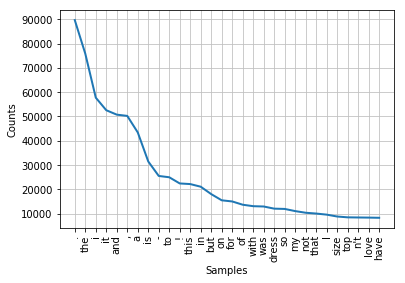

In [14]:
# get the list of most popular words
# But before that I have to import the regular expression library and many others
import re
import itertools
import string

import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.probability import FreqDist



reviews_chart = reviews.copy()
for i in range(len(reviews_chart)):
    reviews_chart[i] = word_tokenize(reviews_chart[i])
    
# merge a list of lists
all_reviews = list(itertools.chain.from_iterable(reviews_chart))

# frequency distribution
fdist = FreqDist(all_reviews)
print(fdist.most_common(30))

# Frequency Distribution Plot
import matplotlib.pyplot as plt
fdist.plot(30,cumulative=False)
plt.show()

Unfortunatly, all the common words I've gotten are nonmeaningfull, so that I will Apply a first round of text cleaning techniques


In [15]:
# prepare text data

# firstly, I concatenate all review text in to a string and also lower all of them. They are separated by ' '
all_words = df['reviews'].str.lower().str.cat(sep = ' ')

# removes punctuation, numbers and returns list of words
all_words = re.sub('[^A-Za-z]+', ' ', all_words)

# remove all stopwords and numeric from the text
stop_words = set(stopwords.words('english'))
tokens = nltk.word_tokenize(all_words)
no_stop_words = []
for w in tokens:
    if (w not in stop_words) and (w.isdigit() is False):
        no_stop_words.append(w)

In [16]:
# Stemming
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()

for i in range(5):
    stemmed_words=[]
    for word in no_stop_words:
        stemmed_words.append(stemmer.stem(word))

    print('Original senstence:', no_stop_words)
    print('Stemmed sentence:', stemmed_words)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[('love', 16783), ('dress', 13862), ('fit', 12243), ('size', 11042), ('look', 9620), ('top', 9559), ('wear', 8209), ('like', 8123), ('great', 7907), ('color', 7791), ('fabric', 5182), ('would', 5133), ('small', 5090), ('order', 5053), ('beauti', 4978), ('perfect', 4725), ('cute', 4602), ('nice', 4362), ('flatter', 4198), ('realli', 4074), ('littl', 3928), ('one', 3856), ('comfort', 3842), ('soft', 3838), ('tri', 3662), ('well', 3492), ('shirt', 3457), ('back', 3341), ('run', 3317), ('sweater', 3187)]


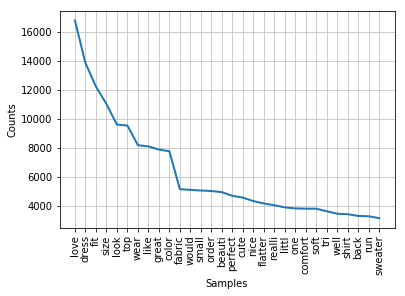

In [17]:
# After cleaning the text, I will rereview the chart to take a look on what I get
reviews_chart = stemmed_words.copy()
for i in range(len(reviews_chart)):
    reviews_chart[i] = word_tokenize(reviews_chart[i])
    
# merge a list of lists
all_reviews = list(itertools.chain.from_iterable(reviews_chart))

# frequency distribution
fdist = FreqDist(all_reviews)
print(fdist.most_common(30))

# Frequency Distribution Plot
import matplotlib.pyplot as plt
fdist.plot(30,cumulative=False)
plt.show()

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22628 entries, 0 to 23485
Data columns (total 11 columns):
Clothing ID                22628 non-null int64
Age                        22628 non-null int64
Title                      22628 non-null object
Review Text                22628 non-null object
Rating                     22628 non-null int64
Recommendation             22628 non-null int64
Positive Feedback Count    22628 non-null int64
Division Name              22628 non-null object
Product Category           22628 non-null object
clothes type               22628 non-null object
reviews                    22628 non-null object
dtypes: int64(5), object(6)
memory usage: 2.1+ MB


In [19]:
# Saving the processed file
df.to_csv('../data/Cleaned-womens-ecommerce-clothing-reviews.csv', index=False)